[56.16074731 -9.45928155]
[-87.26426069 -87.34348496]
[-9.88806732 -6.44510651]
[ 34.83092776 -61.58165542]
[ -43.45416715 -105.59629041]
[[  56.16074731   -9.45928155]
 [ -87.26426069  -87.34348496]
 [  -9.88806732   -6.44510651]
 [  34.83092776  -61.58165542]
 [ -43.45416715 -105.59629041]]
Iteration: 1 | Loss: 10508053.032056091
Iteration: 2 | Loss: 8620179.045771377
Iteration: 3 | Loss: 7370354.085742032
Iteration: 4 | Loss: 6894872.289141515
Iteration: 5 | Loss: 6687194.512345137
Iteration: 6 | Loss: 6386401.738783944
Iteration: 7 | Loss: 5712690.082601673
Iteration: 8 | Loss: 5324720.890519913
Iteration: 9 | Loss: 5222337.788637493
Iteration: 10 | Loss: 5189016.511216242
Iteration: 11 | Loss: 5164121.807472715
Iteration: 12 | Loss: 5129559.347383233
Iteration: 13 | Loss: 5066081.72312024
Iteration: 14 | Loss: 4979099.436419911
Iteration: 15 | Loss: 4848776.002162703
Iteration: 16 | Loss: 4657332.382967431
Iteration: 17 | Loss: 4474364.078720306
Iteration: 18 | Loss: 4328604.82081

<IPython.core.display.Javascript object>


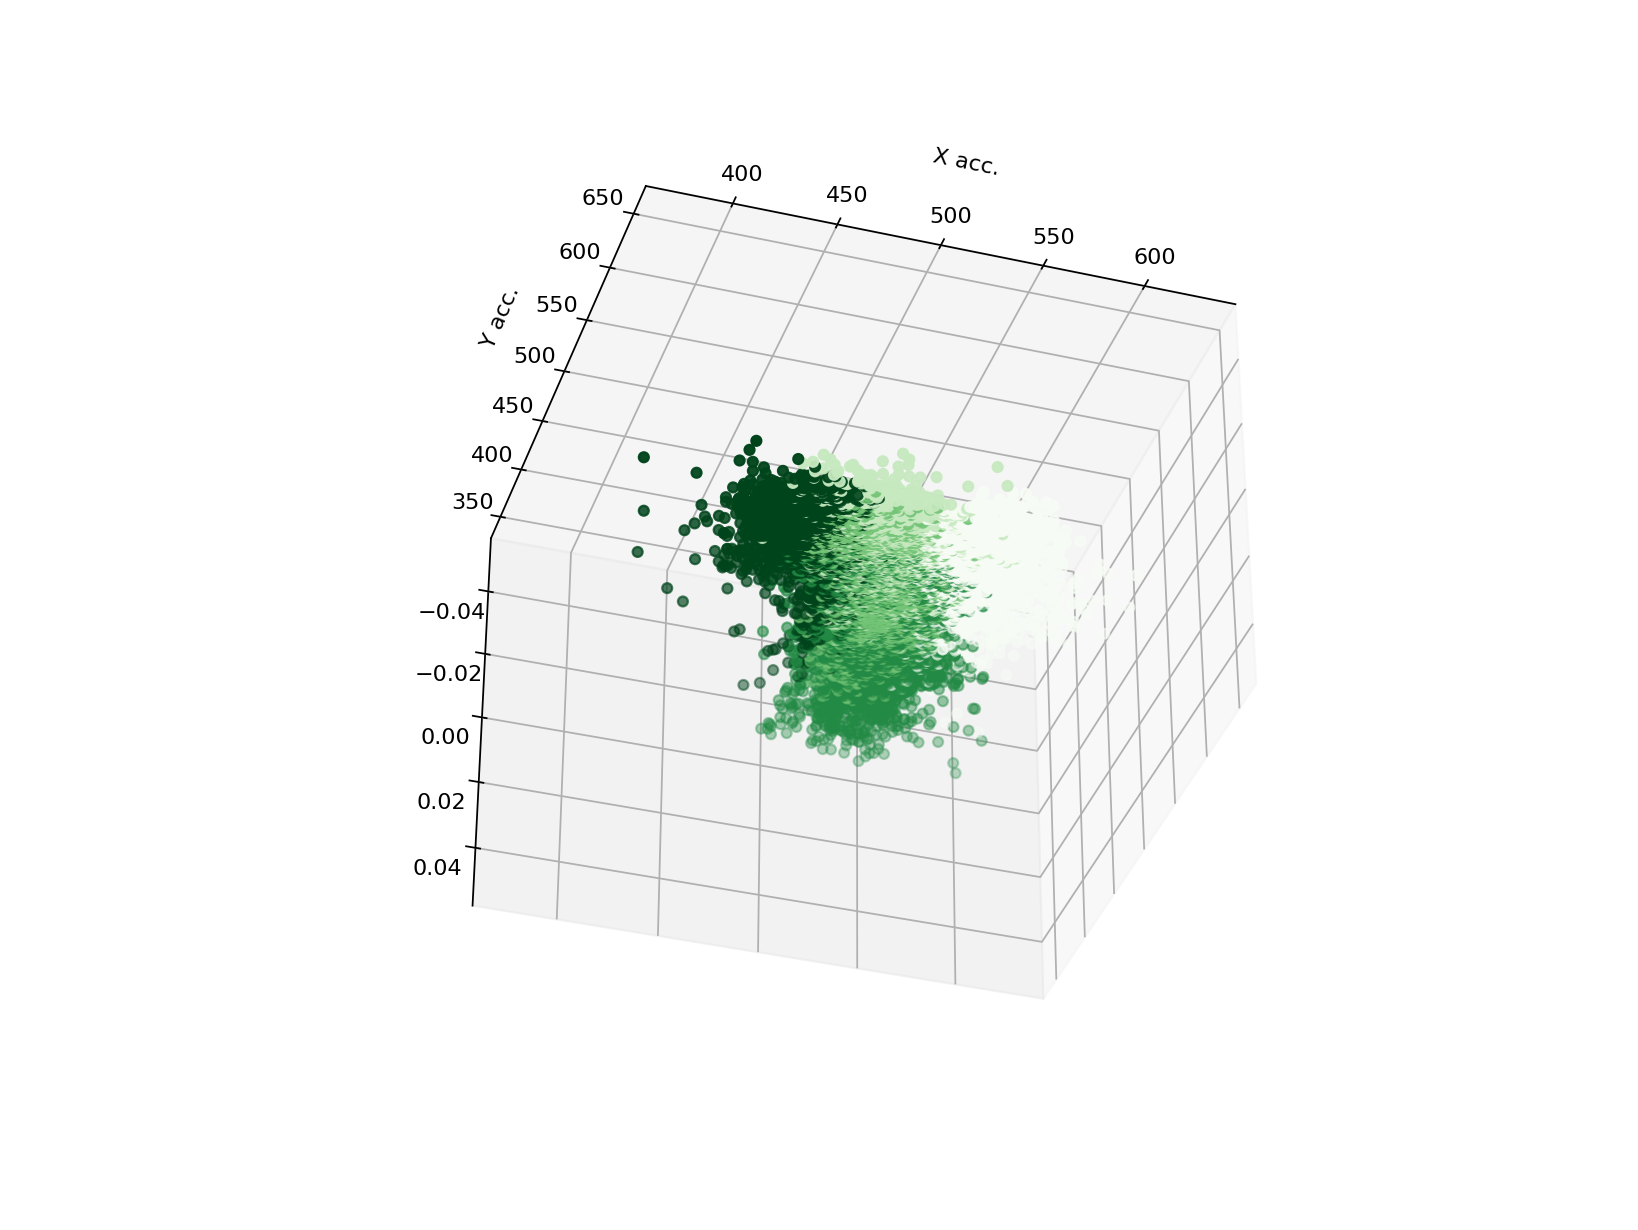

<IPython.core.display.Javascript object>


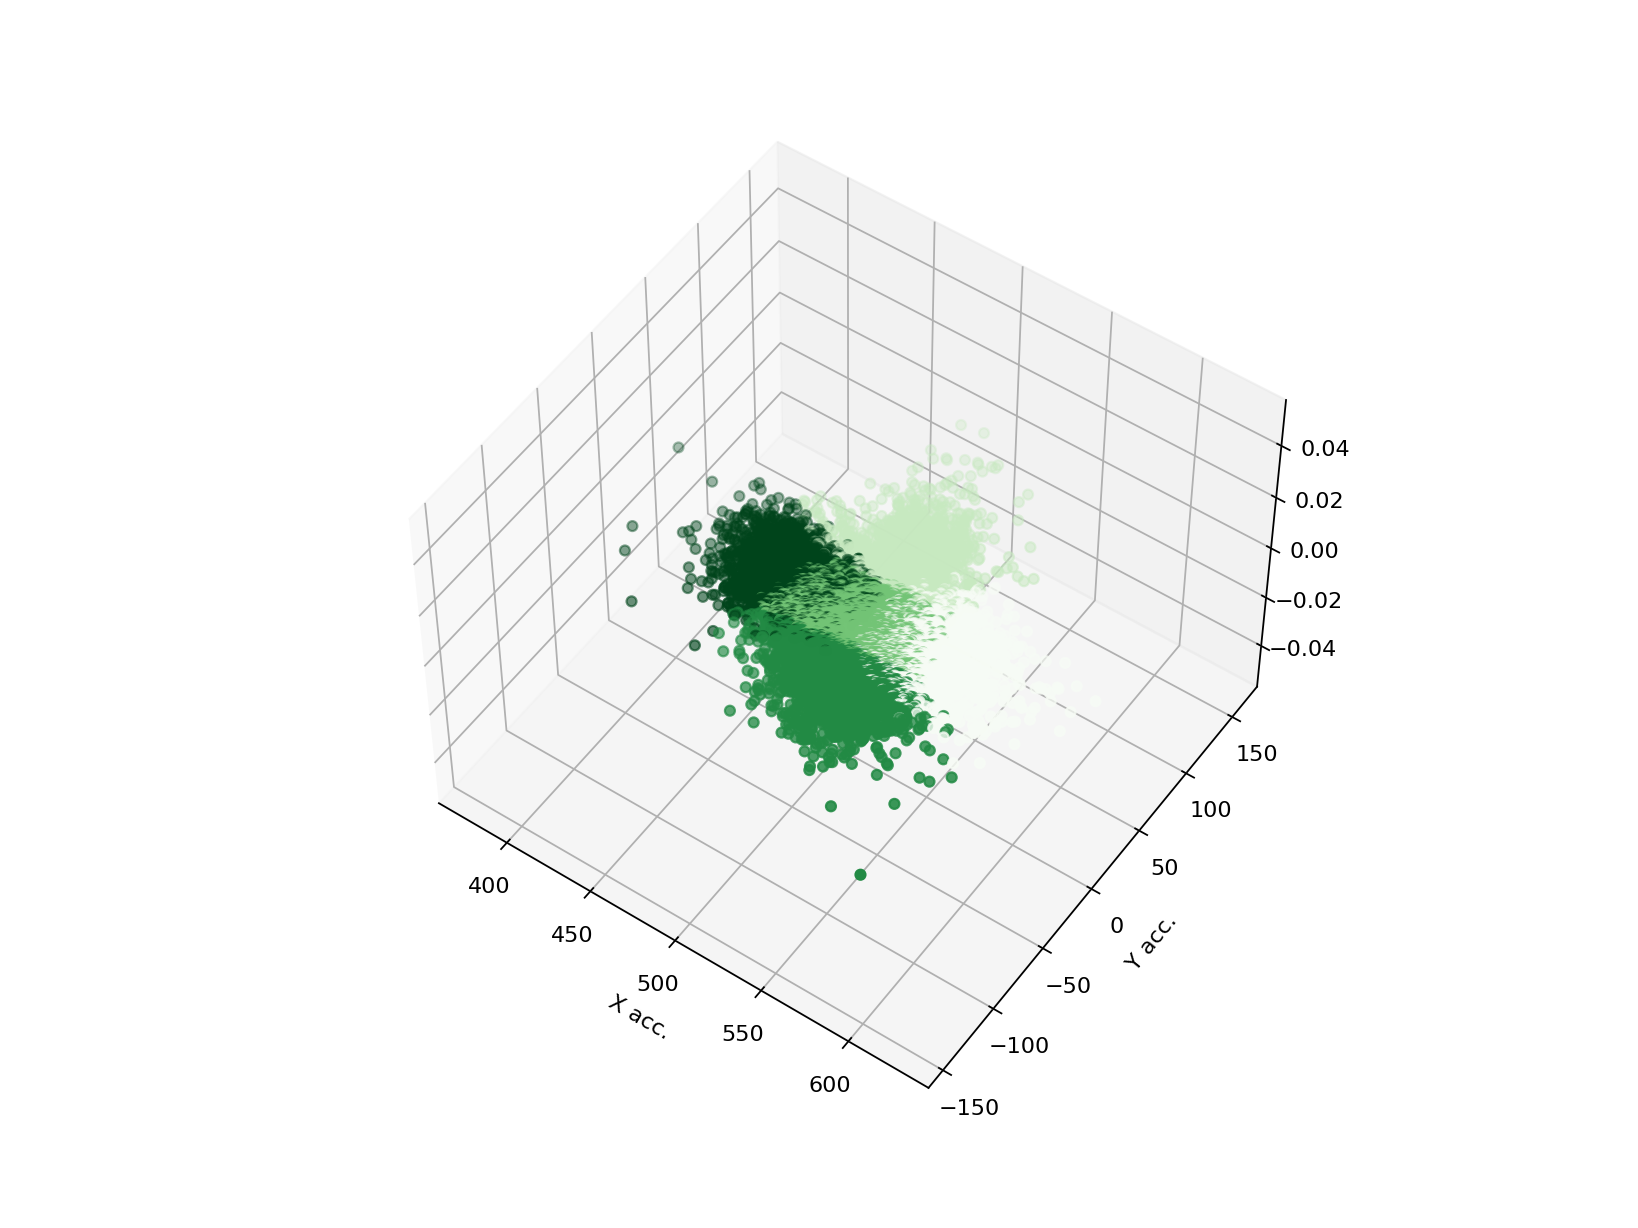

"\nnp.savetxt('Y_tr.txt', Y_tr)\nnp.savetxt('Y_tr_k_means.txt', Y_tr_k_means)\n\nX_tr = X_tr[:,3:]\nX_tr = X_tr/X_tr.max()\nsoftmax.train(X_tr, Y_tr, 3)\n"

In [1]:
from stanford_cs229.modeling.softmax import SoftmaxRegression
from stanford_cs229.modeling.k_means import KMeans
from stanford_cs229.utils.util import load_our_data, plot, preprocess_rolling_avg
from stanford_cs229.utils.csv_plotter_classifier import format_data

import numpy as np

import matplotlib.pyplot as plt
from importlib import reload
reload(plt)
%matplotlib notebook

softmax = SoftmaxRegression(lr=0.01, max_iter=1000)

X_tr = load_our_data('stanford_cs229/data/ydeskx_overhand_weight_4-60Hz.csv')

X_tr_prep = preprocess_rolling_avg(X_tr) # Preprocessed for k_means

Y_tr = format_data(X_tr)

k_means = KMeans(verbose=True)
Y_tr_k_means = k_means.assign(X_tr_prep,5,random=True) # Use hard-coded centroid initializations

print(Y_tr)
print(Y_tr_k_means)


fig1 = plt.figure(0)
ax1 = plt.axes(projection='3d')
#ax1.scatter3D(X_tr[:,0], X_tr[:,1], X_tr[:,2], c=Y_tr*40, cmap='Greens')
#ax1.scatter(X_tr[:,0], X_tr[:,1], c=Y_tr*40, cmap='Greens')
ax1.scatter(X_tr[:,0], X_tr[:,1], c=Y_tr_k_means*40, cmap='Greens')


ax1.set_xlabel('X acc.')
ax1.set_ylabel('Y acc.')
#ax1.set_zlabel('Z acc.')

"""
plt.figure(0) 
plt.plot(Y_tr)
plt.savefig('manual_labeling.png', dpi=300)
plt.figure(1) 
plt.plot(Y_tr_k_means)
plt.savefig('k_means_labeling.png', dpi=300)
"""
fig2 = plt.figure(1)
ax2 = plt.axes(projection='3d')
#ax2.scatter3D(X_tr[:,0], X_tr[:,1], X_tr[:,2], c=Y_tr_k_means*40, cmap='Greens')
ax2.scatter(X_tr[:,0], X_tr_prep[:,1], c=Y_tr_k_means*40, cmap='Greens')
ax2.set_xlabel('X acc.')
ax2.set_ylabel('Y acc.')
#ax2.set_zlabel('Z acc.')

#print(len(X_tr[:,0]))
#print(sum(Y_tr!=Y_tr_k_means))
"""
np.savetxt('Y_tr.txt', Y_tr)
np.savetxt('Y_tr_k_means.txt', Y_tr_k_means)

X_tr = X_tr[:,3:]
X_tr = X_tr/X_tr.max()
softmax.train(X_tr, Y_tr, 3)
"""

In [ ]:
Y_pred = softmax.predict(X_tr)
accuracy = np.sum(Y_pred == Y_tr) / Y_tr.size
accuracy